In [1]:
%matplotlib inline
import hypernetx as hnx

# Use custom MastodonClient
from mastodon_recommender.mastodon import MastodonClient
mc = MastodonClient("A@b")

# The following function fetches the replies to a status
# Replies are represented by their url on the original server.
# This representation should be the same across instances
#
def get_descendant_urls(instance, account, status_url):
    account_id = mc.lookup_account_id(instance, account)
    resp = mc.account_statuses(instance, account_id)

    if resp is None:
        return []

    def get_relevant_status_id(data):
        dd = [x for x in data if x['url'] == status_url]

        if len(dd) != 1:
            return

        return dd[0]['id']

    status_id = get_relevant_status_id(resp)

    descendants = mc.descendants_for_status_id(instance, status_id)
    if descendants is None:
        return []

    return [descendant["url"] for descendant in descendants]

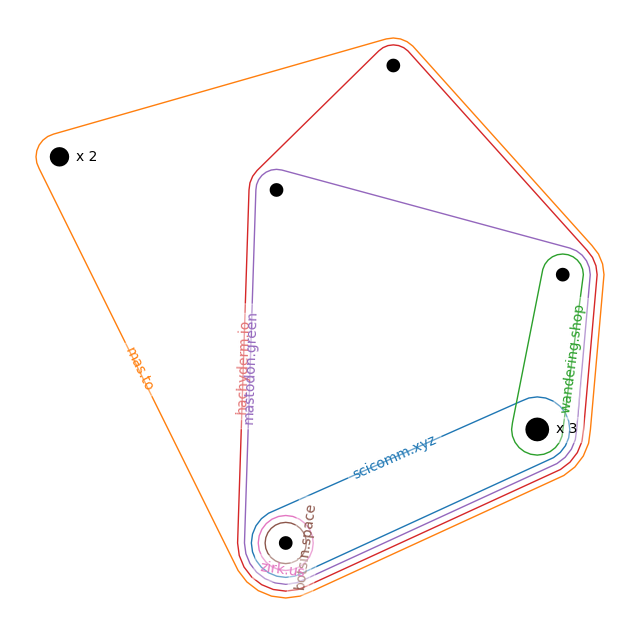

In [2]:
# This is the account name of the status we are looking the replies up for
account = "@helgek@mas.to"

# This is the URL of the status, we are looking the replies up for on its origin server
status_url = "https://mas.to/@helgek/109610212716916590"

instances = ["towns.gay", "mastodon.green", "mas.to", 'scicomm.xyz', "botsin.space", "hachyderm.io", "zirk.us", "wandering.shop", "freethought.online"]


replies_by_instances = {i: get_descendant_urls(i, account, status_url) for i in instances}



H = hnx.Hypergraph(replies_by_instances)
hnx.drawing.draw(H.collapse_nodes(), with_node_counts=True)